# LSTM-RNN Network

In [1]:
import pandas as pd
import numpy as np
import keras
from matplotlib import pyplot as plt


## Data loading

In [2]:
dataTrain = pd.read_csv("DATA_train.csv")
dataTrain = pd.DataFrame(dataTrain)

## Training data processing

In [3]:
# Prepare input sequences (X_Train) and values to predict (y_Train)
X_Train = []
y_Train = []
observation_size = 10

for i in range(len(dataTrain) - observation_size):
    # Take two consecutive observations
    X_Train.append(dataTrain.iloc[i:i + observation_size, 1:])  # Columns [Price, Open, High, Low, Change]

    # Predict 'Open' and 'Close' for the third time step
    y_Train.append(dataTrain.iloc[i + observation_size, [2, 1]])  # Open = column 2, Close = column 1

X_Train = np.array(X_Train)
y_Train = np.array(y_Train)

X_Train = X_Train.astype("float32")
y_Train = y_Train.astype("float32")

# Check dimensions
print("Shape of X_Train:", X_Train.shape)  # (number of examples, 10, 5)
print("Shape of y_Train:", y_Train.shape)  # (number of examples, 2)

Shape of X_Train: (9768, 10, 5)
Shape of y_Train: (9768, 2)


## Building the CNN-LSTM model

In [4]:
model = keras.Sequential([
    keras.layers.Input(shape=(10, 5)),
    keras.layers.LSTM(50, activation='relu', return_sequences=True),
    keras.layers.LSTM(50, activation='relu', return_sequences=False),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2, activation='linear')
])

# Model compilation
model.compile(optimizer='adam', loss='huber')

# Training
model.fit(X_Train, y_Train, epochs=200, batch_size=32, verbose=0)


## Validation data procressing

In [5]:
dataTest = pd.read_csv("DATA_TEST.csv")
dataTest = pd.DataFrame(dataTest)

# Prepare input sequences (X_Test) and values to predict (y_Test)
X_Test = []
y_Test = []

for i in range(len(dataTest) - 10):
    # Take two consecutive observations
    X_Test.append(dataTest.iloc[i:i + 10, 1:])  # Columns [Price, Open, High, Low, Change]

    # Predict 'Open' and 'Close' for the third time step
    y_Test.append(dataTest.iloc[i + 10, [2, 1]])  # Open = column 2, Close = column 1

X_Test = np.array(X_Test)
y_Test = np.array(y_Test)

X_Test = X_Test.astype("float32")
y_Test = y_Test.astype("float32")

# Check dimensions
print("Shape of X_Test:", X_Test.shape)  # (number of examples, 10, 5)
print("Shape of y_Test:", y_Test.shape)  # (number of examples, 2)

Shape of X_Test: (4091, 10, 5)
Shape of y_Test: (4091, 2)


## Validation

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
RMSE Open: 0.008645204
RMSE Close: 0.009802802


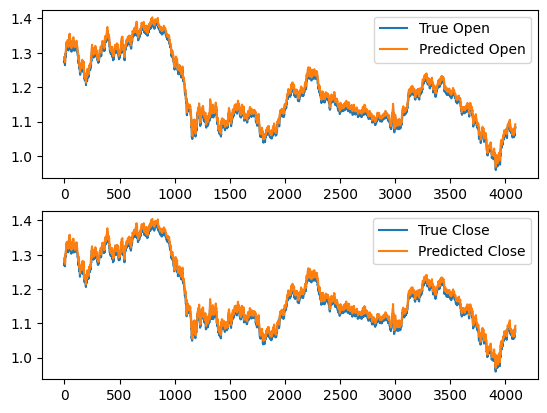

In [6]:
# Predict 'Open' and 'Close' values for a new dataset
predictions = model.predict(X_Test)

Open_rmse = np.sqrt(np.mean(predictions[:, 0] - y_Test[:, 0]) ** 2)
Close_rmse = np.sqrt(np.mean(predictions[:, 1] - y_Test[:, 1]) ** 2)

print("RMSE Open:", Open_rmse)
print("RMSE Close:", Close_rmse)

plt.subplot(2, 1, 1)
plt.plot(y_Test[:, 0], label='True Open')
plt.plot(predictions[:, 0], label='Predicted Open')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(y_Test[:, 1], label='True Close')
plt.plot(predictions[:, 1], label='Predicted Close')
plt.legend()
plt.show()